# DESCUBRA QUEM FEZ O ENEM COMO TREINEIRO

- importando bibliotecas

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- lendo dados de treino e teste

In [22]:
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')
pd.options.display.max_columns = None

In [33]:
print('numero de colunas nos dados de treino: ', len(df_treino.columns))
print('numero de colunas nos dados de teste: ',len(df_teste.columns))

numero de colunas nos dados de treino:  167
numero de colunas nos dados de teste:  43


In [24]:
list(df_treino.columns)

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [25]:
df_treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

- criando dataframe de treino base com intersecção de features

In [26]:
intersection_features = df_teste.columns.tolist()
intersection_features.append('IN_TREINEIRO')

In [29]:
df_treino_base = df_treino[intersection_features]

In [34]:
len(df_treino_base.columns)

44

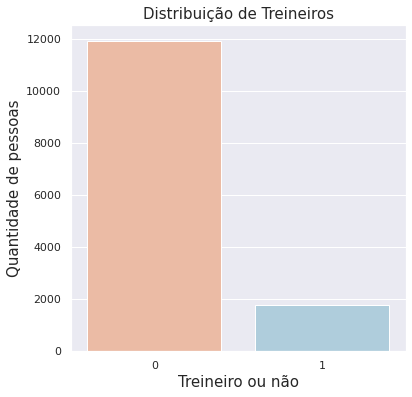

In [50]:
# distribuição do target mal balanceada
#sns.countplot(df_treino_base['IN_TREINEIRO'])
plt.figure(figsize = (6,6))
sns.set(style="darkgrid")
sns.countplot(x = 'IN_TREINEIRO', data= df_treino_base, palette="RdBu")
plt.title('Distribuição de Treineiros', size=15)
plt.xlabel('Treineiro ou não', size = 15)
plt.ylabel('Quantidade de pessoas', size = 15)
plt.show()

In [39]:
Geral = pd.DataFrame({'colunas':df_treino_base.columns,
                      'tipo':df_treino_base.dtypes,
                      'qtd NaN':df_treino_base.isna().sum(),
                      '% NaN':df_treino_base.isna().sum()/df_treino_base.shape[0]})
Geral

,colunas,tipo,qtd NaN,% NaN
NU_INSCRICAO,NU_INSCRICAO,object,0,0.000000
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,0.000000
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,0.000000
NU_IDADE,NU_IDADE,int64,0,0.000000
TP_SEXO,TP_SEXO,object,0,0.000000
TP_COR_RACA,TP_COR_RACA,int64,0,0.000000
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,0.000000
TP_ESCOLA,TP_ESCOLA,int64,0,0.000000


- verificando correlaçao das features x IN_TREINEIRO

In [44]:
df_treino_base.corr(method = 'spearman')['IN_TREINEIRO'].sort_values(ascending = False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.536272
TP_PRESENCA_CH            0.094805
TP_PRESENCA_CN            0.094805
TP_PRESENCA_MT            0.092589
TP_PRESENCA_LC            0.092589
TP_COR_RACA               0.010986
TP_STATUS_REDACAO         0.007642
IN_SABATISTA              0.003824
IN_DISCALCULIA           -0.003297
IN_DISLEXIA              -0.003297
IN_IDOSO                 -0.004663
NU_NOTA_COMP1            -0.005489
IN_SURDEZ                -0.007374
IN_GESTANTE              -0.011893
TP_NACIONALIDADE         -0.012404
IN_BAIXA_VISAO           -0.013602
NU_NOTA_COMP2            -0.019051
NU_NOTA_COMP4            -0.021080
NU_NOTA_REDACAO          -0.022174
NU_NOTA_COMP5            -0.023352
NU_NOTA_COMP3            -0.027839
NU_NOTA_LC               -0.028420
NU_NOTA_CN               -0.031549
TP_LINGUA                -0.036395
NU_NOTA_CH               -0.049434
CO_UF_RESIDENCIA         -0.055914
TP_ESCOLA                -0.258023
TP_ANO_CONCLUIU     

- FEATURES UTILIZADAS PARA TREINO : 'TP_ST_CONCLUSAO'= maior correlação positiva , 'NU_IDADE' = maior correlação negativa

In [36]:
Xtrain, Ytrain = (df_treino_base[['TP_ST_CONCLUSAO', 'NU_IDADE']], df_treino_base['IN_TREINEIRO'])

- SEPARANDO EM TREINO E TESTE

In [52]:
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain, Ytrain, test_size = 0.2, random_state=42)

In [53]:
X_test = df_teste[['TP_ST_CONCLUSAO', 'NU_IDADE']]

- APLICANDO PADRONIZAÇÃO

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

MODELO DE CLASSIFICAÇÃO: RandomForestClassifier()

In [58]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [60]:
Y_predict_val = classifier.predict(X_val)

Accuracy: 0.9970866715222141
Precision: 1.0


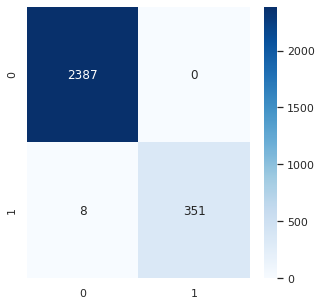

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_val,Y_predict_val), annot=True, cmap="Blues", fmt= 'g')
print('Accuracy:', metrics.accuracy_score(Y_val,Y_predict_val))
print('Precision:', metrics.precision_score(Y_val,Y_predict_val))

In [64]:
Y_pred_test = classifier.predict(X_test)

In [67]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_teste.NU_INSCRICAO
df_answer['IN_TREINEIRO'] = Y_pred_test.astype(int)

In [68]:
df_answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [69]:
df_answer.to_csv('answer.csv', index=False, header=True)